班级、组员的姓名和学号。

1、构建“小组偏爱的演员网络”。根据组员的偏好，爬取豆瓣上不少于200部评分不低于7分的中国 (含香港、澳门、台湾) 电视剧的“主演”信息。凡主演同一部电视剧的演员之间建立一条连边。连边上的权重代表演员之间的合作 (即: 共同出演同一部剧的)次数。

2、构建“官方偏爱的演员网络”。根据中国电视剧三大奖项: 飞天奖、金鹰奖、白玉兰奖的获奖名单，从豆瓣爬取名单上不少于200部电视剧的“主演”信息。凡主演..... (同上)。

3、用Python绘制出上述两个演员合作网 (有权图)。

4、计算两个网络中，各节点的四种中心性(点度中心性、中介中心性、接近中心性、特征向量中心性)，并排序、输出各结果中排在前30的演员名单及其排序，同时，解读每种中心性结果的现实意义，并比较两个网络中共同出现的演员在不同网络中，各中心性指标的得分差异【提示:跨网络比较，请使用标准化的XX中心性得分】。

5、针对每种中心性度量中得分最高的5个节点，写一个循环，每次去掉一个当前得分最高的节点并输出节点排序情况。观察网络中，各节点XX中心性的排序变化情况，并在此基础上加深理解各中心性指标与网络结构之间的关系。

In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations

#小组偏爱的演员网络
df1 = pd.read_csv('data1.csv').iloc[:200]

# 创建一个空的networkx图对象
G1 = nx.Graph()

# 遍历dataframe的每一行
for index, row in df1.iterrows():
    # 分割演员列，获取每部剧的所有演员
    actors1 = row['主演'].strip(" ").split(' ')

    # 生成演员的所有可能的两两配对
    edges1 = list(combinations(actors1, 2))
    # 添加在同一部剧里共同出演的演员作为边关系
    for edge in edges1:
        if G1.has_edge(*edge):  # 如果边已经存在，则权重增加
            G1[edge[0]][edge[1]]['weight'] += 1
        else:  # 新建边，并设置权重
            G1.add_edge(edge[0], edge[1], weight=1)

D:\Users\v_yuhaozeng\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Users\v_yuhaozeng\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\Users\v_yuhaozeng\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


思路：

1、为两个网络创建一个figure，并设置大小为9x16。

2、使用shell_layout计算节点的位置，便于可视化。

3、对于每个网络图，首先获取所有的边，然后用边的权重作为绘制的边的宽度。

4、用nx.draw()来绘制网络，并设置with_labels=True来显示节点的标签（在这个情况里，标签为演员的名字）。

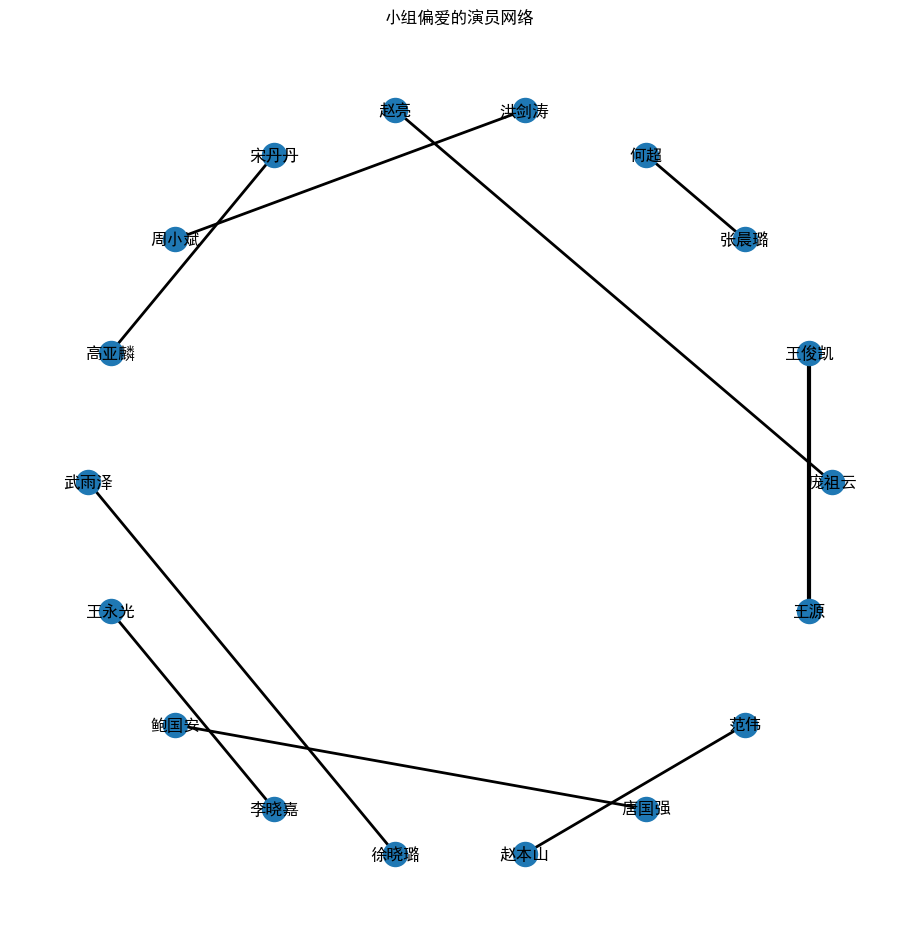

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   # 指定默认字体：解决plot不能显示中文问题
matplotlib.rcParams['axes.unicode_minus'] = False     # 解决保存图像是负号'-'显示为方块的问题
# 创建一个新的figure，并设置尺寸为9x9
plt.figure(figsize=(9,9))
#使用shell布局方式，计算每个节点的位置
pos = nx.shell_layout(G1)
#减少边的数量：删除权重低的边，仅保留权重高的边。例如你可以设置一个阈值，如权重大于1。
edges = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] > 1]
#依靠上一步获取的边列表生成新的子图
G1 = G1.edge_subgraph(edges)
#获取筛选后的边的权值
weights = [G1[u][v]['weight'] for u,v in edges]
#将新的子图使用前面计算的节点位置和权值进行绘制，其中weights参数设置了边的宽度，with_labels为True则每个节点都有标签
nx.draw(G1, pos, width=weights, with_labels=True)
#设置图像的标题为"小组偏爱的演员网络
plt.title("小组偏爱的演员网络")
#保存图片为'小组偏爱的演员网络-有权图.png
plt.savefig('小组偏爱的演员网络-有权图.png')
#最后将生成的图像显示出来
plt.show()

In [4]:
#官方偏爱的演员网络
df2 = pd.read_csv('data2.csv').iloc[:200]

# 创建一个空的networkx图对象
G2 = nx.Graph()

# 遍历dataframe的每一行
for index, row in df2.iterrows():
    # 分割演员列，获取每部剧的所有演员
    actors2 = row['主演'].strip(" ").split(' ')

    # 生成演员的所有可能的两两配对
    edges2 = list(combinations(actors2, 2))
    # 添加在同一部剧里共同出演的演员作为边关系
    for edge in edges2:
        if G2.has_edge(*edge):  # 如果边已经存在，则权重增加
            G2[edge[0]][edge[1]]['weight'] += 1
        else:  # 新建边，并设置权重
            G2.add_edge(edge[0], edge[1], weight=1)

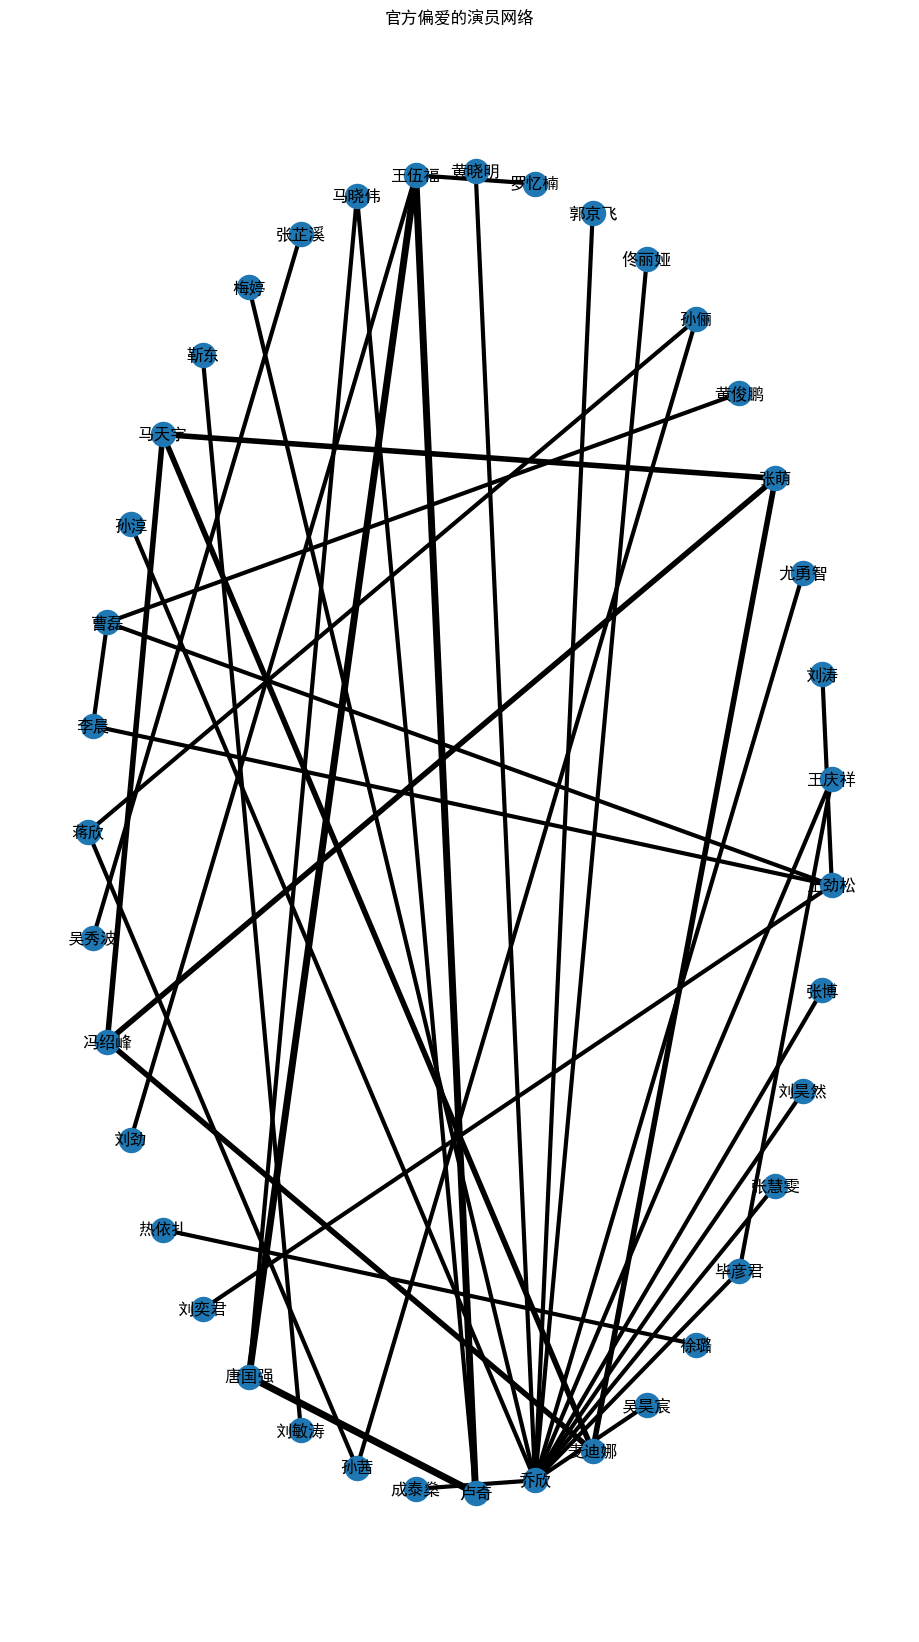

In [6]:
# 绘制图G2
plt.figure(figsize=(9,16))
pos = nx.shell_layout(G2)
edges = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > 2]
G2 = G2.edge_subgraph(edges)  
weights = [G2[u][v]['weight'] for u,v in edges]
nx.draw(G2, pos, width=weights, with_labels=True)
plt.title("官方偏爱的演员网络")
plt.savefig('官方偏爱的演员网络-有权图.png')
plt.show()

在代码里，
1、"degree_centrality"是对演员在网络中连接的数量的度量，

2、"betweenness_centrality"基于演员在网络中经过的最短路径的数量，

3、"closeness_centrality"则度量了一个演员跟其他演员的“接近程度”，

4、"eigenvector_centrality"则是一个演员的邻居们在网络中的重要程度（或者中心性）的度量。

通过比较两个网络中同一演员的各种中心性得分，我们可以深入了解他们在不同社交环境中的表现。

例如，如果一个演员在两个网络中都具有高的度中心性，这可能意味着他们在不同的社交环境中都有大量的合作伙伴。

如果一个演员在一个网络中的度中心性高，而在另一个网络中低，那么可能他在一个特定的社交环境中更活跃。

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 将数据标准化到0到1的范围
def scale_data(data):
    #使用sklearn.preprocessing模块中的MinMaxScaler构造函数创建一个数据缩放器，其作用是将数据缩放到指定的范围
    scaler = MinMaxScaler()
    #将数据转换为numpy数组并调整形状为(-1,1)，然后调用fit_transform方法完成标准化
    return scaler.fit_transform(np.array(data).reshape(-1,1))

# 计算并提取前30种中心性
def compute_centrality_and_print_top30(network):
    #计算每个节点的度中心性
    degree_centrality = nx.degree_centrality(network)
    #计算每个节点的介数中心性
    betweenness_centrality = nx.betweenness_centrality(network)
    #计算每个节点的紧密中心性
    closeness_centrality = nx.closeness_centrality(network)
    #计算每个节点的特征向量中心性
    eigenvector_centrality = nx.eigenvector_centrality(network)

    # 数据标准化
    degree_centrality_scaled = scale_data(list(degree_centrality.values()))
    betweenness_centrality_scaled = scale_data(list(betweenness_centrality.values()))
    closeness_centrality_scaled = scale_data(list(closeness_centrality.values()))
    eigenvector_centrality_scaled = scale_data(list(eigenvector_centrality.values()))
    
    # 创建新的字典
    degree_centrality_norm = dict(zip(degree_centrality.keys(), degree_centrality_scaled.flatten()))
    betweenness_centrality_norm = dict(zip(betweenness_centrality.keys(), betweenness_centrality_scaled.flatten()))
    closeness_centrality_norm = dict(zip(closeness_centrality.keys(), closeness_centrality_scaled.flatten()))
    eigenvector_centrality_norm = dict(zip(eigenvector_centrality.keys(), eigenvector_centrality_scaled.flatten()))

    # 提取前30
    degree_top30 = sorted(degree_centrality_norm.items(), key=lambda item:item[1], reverse=True)[:30]
    betweenness_top30 = sorted(betweenness_centrality_norm.items(), key=lambda item:item[1], reverse=True)[:30]
    closeness_top30 = sorted(closeness_centrality_norm.items(), key=lambda item:item[1], reverse=True)[:30]
    eigenvector_top30 = sorted(eigenvector_centrality_norm.items(), key=lambda item:item[1], reverse=True)[:30]
    
    df = pd.DataFrame()
    df['degree_top30_name'] = [d[0] for d in degree_top30]
    df['degree_top30_value'] = [d[1] for d in degree_top30]
    df['betweenness_top30_name'] = [d[0] for d in betweenness_top30]
    df['betweenness_top30_value'] = [d[1] for d in betweenness_top30]
    df['closeness_top30_name'] = [d[0] for d in closeness_top30]
    df['closeness_top30_value'] = [d[1] for d in closeness_top30]
    df['eigenvector_top30_name'] = [d[0] for d in eigenvector_top30]
    df['eigenvector_top30_value'] = [d[1] for d in eigenvector_top30]
    
    return df


# 计算并打印G1，G2的前30演员和得分
compute_centrality_and_print_top30(G1)


,degree_top30_name,degree_top30_value,betweenness_top30_name,betweenness_top30_value,closeness_top30_name,closeness_top30_value,eigenvector_top30_name,eigenvector_top30_value
0,武雨泽,0.0,武雨泽,0.0,武雨泽,0.0,武雨泽,0.0
1,王永光,0.0,王永光,0.0,王永光,0.0,王永光,0.0
2,鲍国安,0.0,鲍国安,0.0,鲍国安,0.0,鲍国安,0.0
3,李晓嘉,0.0,李晓嘉,0.0,李晓嘉,0.0,李晓嘉,0.0
4,徐晓璐,0.0,徐晓璐,0.0,徐晓璐,0.0,徐晓璐,0.0
5,赵本山,0.0,赵本山,0.0,赵本山,0.0,赵本山,0.0
6,唐国强,0.0,唐国强,0.0,唐国强,0.0,唐国强,0.0
7,范伟,0.0,范伟,0.0,范伟,0.0,范伟,0.0
8,王源,0.0,王源,0.0,王源,0.0,王源,0.0
9,庞祖云,0.0,庞祖云,0.0,庞祖云,0.0,庞祖云,0.0


In [8]:
compute_centrality_and_print_top30(G2)

,degree_top30_name,degree_top30_value,betweenness_top30_name,betweenness_top30_value,closeness_top30_name,closeness_top30_value,eigenvector_top30_name,eigenvector_top30_value
0,乔欣,1.000000,乔欣,1.000000,乔欣,1.000000,乔欣,1.000000e+00
1,王劲松,0.250000,王劲松,0.090909,毕彦君,0.503472,毕彦君,3.694663e-01
2,王伍福,0.250000,王伍福,0.090909,王庆祥,0.503472,王庆祥,3.694663e-01
3,冯绍峰,0.166667,曹磊,0.051948,成泰燊,0.480000,成泰燊,2.697885e-01
4,唐国强,0.166667,唐国强,0.019481,吴昊宸,0.480000,吴昊宸,2.697885e-01
5,卢奇,0.166667,卢奇,0.019481,张慧雯,0.480000,张慧雯,2.697885e-01
6,麦迪娜,0.166667,蒋欣,0.000000,刘昊然,0.480000,刘昊然,2.697885e-01
7,张萌,0.166667,吴秀波,0.000000,张博,0.480000,张博,2.697885e-01
8,马天宇,0.166667,冯绍峰,0.000000,尤勇智,0.480000,尤勇智,2.697885e-01
9,曹磊,0.166667,刘劲,0.000000,佟丽娅,0.480000,佟丽娅,2.697885e-01


思路：我们需要确定哪些节点需要移除，然后在每次迭代中移除一个，并重新计算和打印中心性得分

这段代码通过移除中心性最高的节点，观察剩下的网络中心性指标的变化，以此来理解网络结构如何影响中心性度量。

度中心性最高的节点的移除可能会减少其他节点的度中心性；

移除中介中心性最高的节点可能会改变网络的路径结构，从而影响中介中心性和接近中心性；

而移除了特征向量中心性最高的节点可能改变网络的整体连接模式，从而影响所有的中心性指标。



In [12]:
# 计算中心性并提取前n名
def compute_centrality(graph):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    try:
        eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality did not converge after 1000 iterations")
        eigenvector_centrality = {}

    return degree_centrality, betweenness_centrality, closeness_centrality, eigenvector_centrality

def remove_top_nodes_and_recalculate_centrality(graph, n):
    degree_centrality, betweenness_centrality, closeness_centrality, eigenvector_centrality = compute_centrality(graph)
    
    for i in range(n):
        # 对每个中心性指标，找出得分最高的节点
        top_degree_node = max(degree_centrality, key=degree_centrality.get)
        top_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
        top_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
        top_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)
        
        # 移除现有得分最高的节点
        nodes_to_remove = {top_degree_node, top_betweenness_node, top_closeness_node, top_eigenvector_node}
        graph.remove_nodes_from(nodes_to_remove)
        
        # 重新计算中心性
        degree_centrality, betweenness_centrality, closeness_centrality, eigenvector_centrality = compute_centrality(graph)
        
        # 打印新的中心性得分
        print(f"\nAfter Removal {i+1}")
        print(f"Top Degree Centrality: {max(degree_centrality, key=degree_centrality.get)}")
        print(f"Top Betweenness Centrality: {max(betweenness_centrality, key=betweenness_centrality.get)}")
        print(f"Top Closeness Centrality: {max(closeness_centrality, key=closeness_centrality.get)}")
        print(f"Top Eigenvector Centrality: {max(eigenvector_centrality, key=eigenvector_centrality.get)}")


In [10]:
        
# 在G1和G2上运行此操作
#复制图
G1_copy = nx.Graph(G1)
remove_top_nodes_and_recalculate_centrality(G1_copy, 5)



After Removal 1
Top Degree Centrality: 王永光
Top Betweenness Centrality: 王永光
Top Closeness Centrality: 王永光
Top Eigenvector Centrality: 王永光

After Removal 2
Top Degree Centrality: 鲍国安
Top Betweenness Centrality: 鲍国安
Top Closeness Centrality: 鲍国安
Top Eigenvector Centrality: 鲍国安

After Removal 3
Top Degree Centrality: 赵本山
Top Betweenness Centrality: 李晓嘉
Top Closeness Centrality: 赵本山
Top Eigenvector Centrality: 赵本山

After Removal 4
Top Degree Centrality: 王源
Top Betweenness Centrality: 徐晓璐
Top Closeness Centrality: 王源
Top Eigenvector Centrality: 王源

After Removal 5
Top Degree Centrality: 庞祖云
Top Betweenness Centrality: 唐国强
Top Closeness Centrality: 庞祖云
Top Eigenvector Centrality: 庞祖云


In [13]:
G2_copy = nx.Graph(G2)
remove_top_nodes_and_recalculate_centrality(G2_copy, 5)


After Removal 1
Top Degree Centrality: 王劲松
Top Betweenness Centrality: 王劲松
Top Closeness Centrality: 王劲松
Top Eigenvector Centrality: 冯绍峰

After Removal 2
Top Degree Centrality: 王伍福
Top Betweenness Centrality: 王伍福
Top Closeness Centrality: 王伍福
Top Eigenvector Centrality: 王伍福

After Removal 3
Top Degree Centrality: 蒋欣
Top Betweenness Centrality: 曹磊
Top Closeness Centrality: 蒋欣
Top Eigenvector Centrality: 蒋欣

After Removal 4
Top Degree Centrality: 唐国强
Top Betweenness Centrality: 吴秀波
Top Closeness Centrality: 唐国强
Top Eigenvector Centrality: 唐国强

After Removal 5
Top Degree Centrality: 麦迪娜
Top Betweenness Centrality: 刘劲
Top Closeness Centrality: 麦迪娜
Top Eigenvector Centrality: 麦迪娜
